# Dense subgraphs

| Student Name         | Student-ID |
|----------------------|------------|
| Marco Di Francesco   | 100632815  |
| Loreto García Tejada | 100643862  |
| György Bence Józsa   | 100633270  |
| József-Hunor Jánosi  | 100516724  |
| Sara-Jane Bittner    | 100498554  |

_Learning goal: To familiarize oneself with one definition of the density of subgraphs._

Consider a graph $G = (V, E)$. Given a subset of vertices $S \subseteq V$ , we propose the following
definition of density:

$$ D(S) = \frac{\sum_{i \in S} \sum_{j \in S} w(i,j)}{|S|}, $$

where $w(i, j)$ is the weight of the edge between vertices $i$ and $j$, if it exists, and $0$ otherwise,
and $|S|$ is the cardinality of the set $S$. Note that in unweighted graphs, $w(i, j) \in \{0, 1\}$.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def density(S: nx.Graph):
    """Calculates the density of (sub)graph S"""
    return S.size(weight='weight') / S.number_of_nodes()

a) Propose a greedy algorithm to find a subgraph with good density according to this definition. Explain the main properties of the algorithm, e.g., does the result depend on the order of execution etc.

Proposition:

We start with $S = \emptyset$.
In the first step, we choose the vertex $v_0$ such that the sum of the weights of the edges connecting to $v$ is maximal. We can call it the vertex with the maximal weight. Add that to $S$.
After that, in each step, we choose a vertex $v_i$ out of the neighbours of $S$, such that $D(S \cup v_i)$ is maximal, and add that to $S$. We repeat this step until $D(S) > D(S \cup v_i)$.
We return S.

In [24]:
def dense_subgraph(G: nx.Graph) -> nx.Graph:
    node_degrees = dict(G.degree)
    max_node = max(zip(node_degrees.values(), node_degrees.keys()))[1]
    S = [max_node]
    while True:
        neighbors = {x for n in S for x in G.neighbors(n)}
        max_value = 0
        candidate = -1
        for v in neighbors:
            S2 = S + [v]
            d1 = density(G.subgraph(S))
            d2 = density(G.subgraph(S2))
            if d2 > d1:
                if d2 > max_value:
                    max_value = d2
                    candidate = v
        if candidate == -1:
            print(S)
            return G.subgraph(S)
        S.append(candidate)


[15, 1, 41, 16, 25, 19, 46, 30, 52, 22, 38, 34, 44, 51, 17, 39, 21, 53]


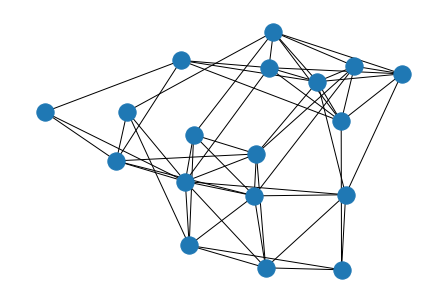

In [25]:
G = nx.Graph()
with open('dolphins.txt') as f:
    n = int(next(f)) # first line is number of vertices
    for line in f:
        i, j = [int(x) for x in line.split()]
        G.add_edge(i, j)

SG = dense_subgraph(G)
nx.draw(SG)

b) Load _dolphins.txt_ data set. In this file, the first line contains the number of vertices. Each subsequent line indicates the two endpoints of an **undirected** edge. Estimate some reasonable lower and upper bounds on $D$.

In [3]:
G = nx.Graph()
with open('dolphins.txt') as f:
    n = int(next(f)) # first line is number of vertices
    for line in f:
        i, j = [int(x) for x in line.split()]
        G.add_edge(i, j)

c) Apply your algorithm on the _dolphins.txt_ data. As a result, provide the maximum density you achieved and the vertices of the corresponding subgraph (in ascending order).

d) isualize the graph using Gephi ([https://gephi.org/](https://gephi.org/)). Use different coloring for vertices that are within the subgraph found in the previous step.